## 1. Describe the distribution and the generating story. Why is your particular problem an example of it?
**Exponential Distribution**

[From wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution): "the exponential distribution is the probability distribution of the time between events in a Poisson point process". Like Shannon, I measured the time intervals between cars passing my office window. If I converted my data to numbers of cars per minute, I would have a poisson distribution, but the time interval between those possion point events is an exponential distribution.

## 2. Collect the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
car_intervals = pd.read_csv("arrival_times.csv")

## 3. Estimate parameters from the data and plot both the data and the reference distribution

In [3]:
scale = car_intervals.mean().iloc[0]
print(f"The scale parameter is {scale:0.2f} seconds")

The scale parameter is 8.42 seconds


In [4]:
# What does the pdf of an expoential distrbution look like with this scale parameter
e = expon.pdf(np.arange(0, car_intervals.max()[0], step = 1.0), scale = scale)

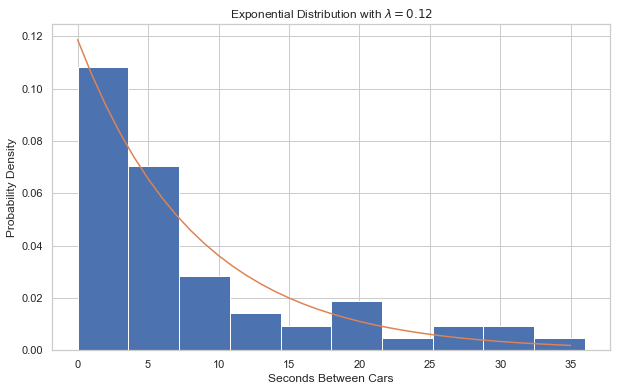

In [5]:
# Now plot the data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title( f"Exponential Distribution with $\lambda={1/scale:.2f}$")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Seconds Between Cars")
axes.hist(car_intervals.values, density = True, bins=10)
axes.plot(e)


This plot of the empirical data and the overlaid PDF seem to match fairly well. This suggests that the drivers on the road outside my office know how to time their arrivals well ;)

---
## 1. Describe the distribution and the generating story. Why is your particular problem an example of it?
**Normal Distribution**

The Normal distribution can occur in many different ways. One way is ([from wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)) "under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable whose distribution converges to a normal distribution as the number of samples increases". In this case, I will be measuring the weights of all the pairs of socks that I own. This might not necessarily be a normal distribution in and of itself, but it will be close to one. The reason being that if we set our sample size to 1, then the above definition "applies" to the weights of my socks. 

## 2. Collect the data

In [6]:
sock_weights = pd.read_csv("sock_weights.csv")

## 3. Estimate parameters from the data and plot both the data and the reference distribution

The normal distribution can be described with two parameters:
- $\mu$: the mean or expectation of the distribution
- $\sigma$: the standard deviation

In [7]:
μ = np.mean(sock_weights)[0]
σ = np.std(sock_weights)[0]
print(f"The mean and standard deviation are μ = {μ:0.2f}, σ = {σ:0.2f}")

The mean and standard deviation are μ = 42.38, σ = 20.62


In [8]:
from scipy.stats import norm

In [9]:
# What does the pdf of a normal distrbution look like with this mean and standard deviation?
n = norm.pdf(np.arange(0, sock_weights.max()[0], step = 1.0), loc = μ, scale = σ)

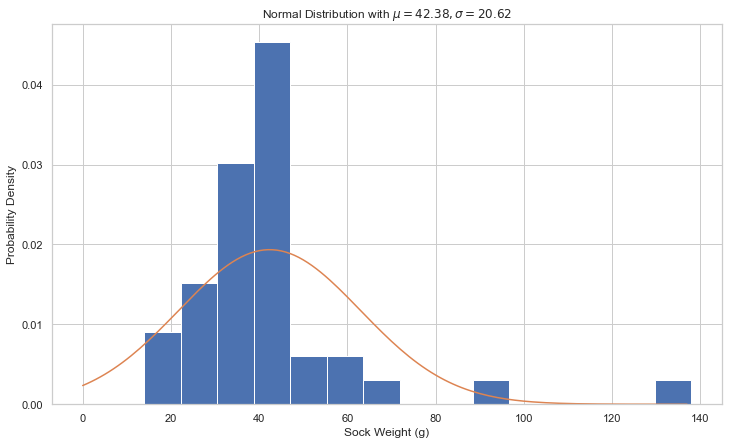

In [10]:
# Now plot the data
figure = plt.figure(figsize=(12,7))
axes = figure.add_subplot(1, 1, 1)
axes.set_title( f"Normal Distribution with $\mu={μ:.2f}, \sigma={σ:.2f}$")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Sock Weight (g)")
axes.hist(sock_weights.values, density = True, bins=15)
axes.plot(n)


As we can see from the histogram, my sock data does not quite follow a normal distribution. There are two large outliers which throw off the distribution. These were because two of my pairs of socks are large, thick wool socks; all the rest are much smaller and thinner. 

One way in which this experiment might be improved, is if I had also measured all of the sock weights of my roommates' socks. Then I could have put together a sample of averages, which themselves should make up a normal distribution

---
Now let's do some Bayesian inference on our data.

In [34]:
def bootstrap_sample(data, f, n=100):
    m = len(data)
    return np.array(
        [f(np.random.choice(data, len(data), replace=True)) for _ in range(n)]
    )

In [35]:
bootstraped_intervals = bootstrap_sample(data = car_intervals.interval_time_s, f = np.mean, n=10_000)

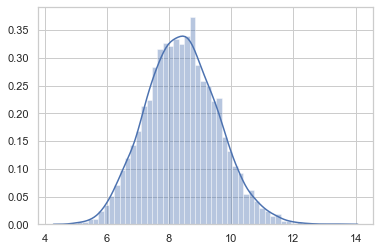

In [36]:
sns.distplot(bootstraped_intervals)

In [37]:
((bootstraped_intervals > 5) & (bootstraped_intervals < 10)).mean()

0.9136

In [38]:
import scipy.stats as stats

In [39]:
stats.mstats.mquantiles(bootstraped_intervals, prob = [0.05, 0.95])

array([ 6.55932203, 10.33898305])